<a href="https://colab.research.google.com/github/152004/minicase2/blob/main/Minicase2_Team4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


array([[<Axes: title={'center': 'acceleration'}>]], dtype=object)

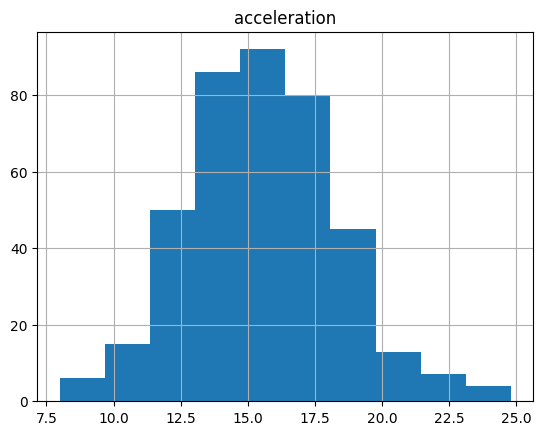

In [ ]:
df.hist('acceleration')


<Axes: xlabel='weight', ylabel='horsepower'>

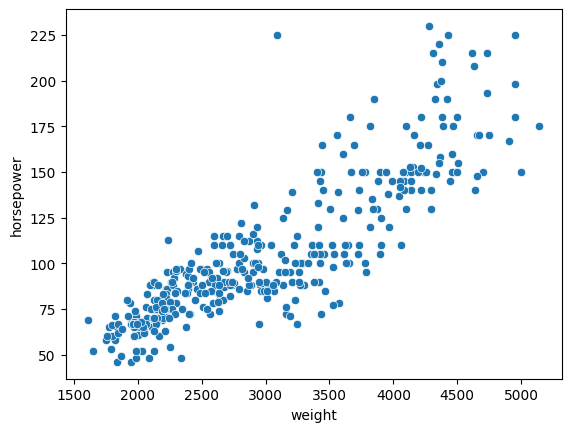

In [ ]:
sns.scatterplot (data=df, y='horsepower', x='weight')

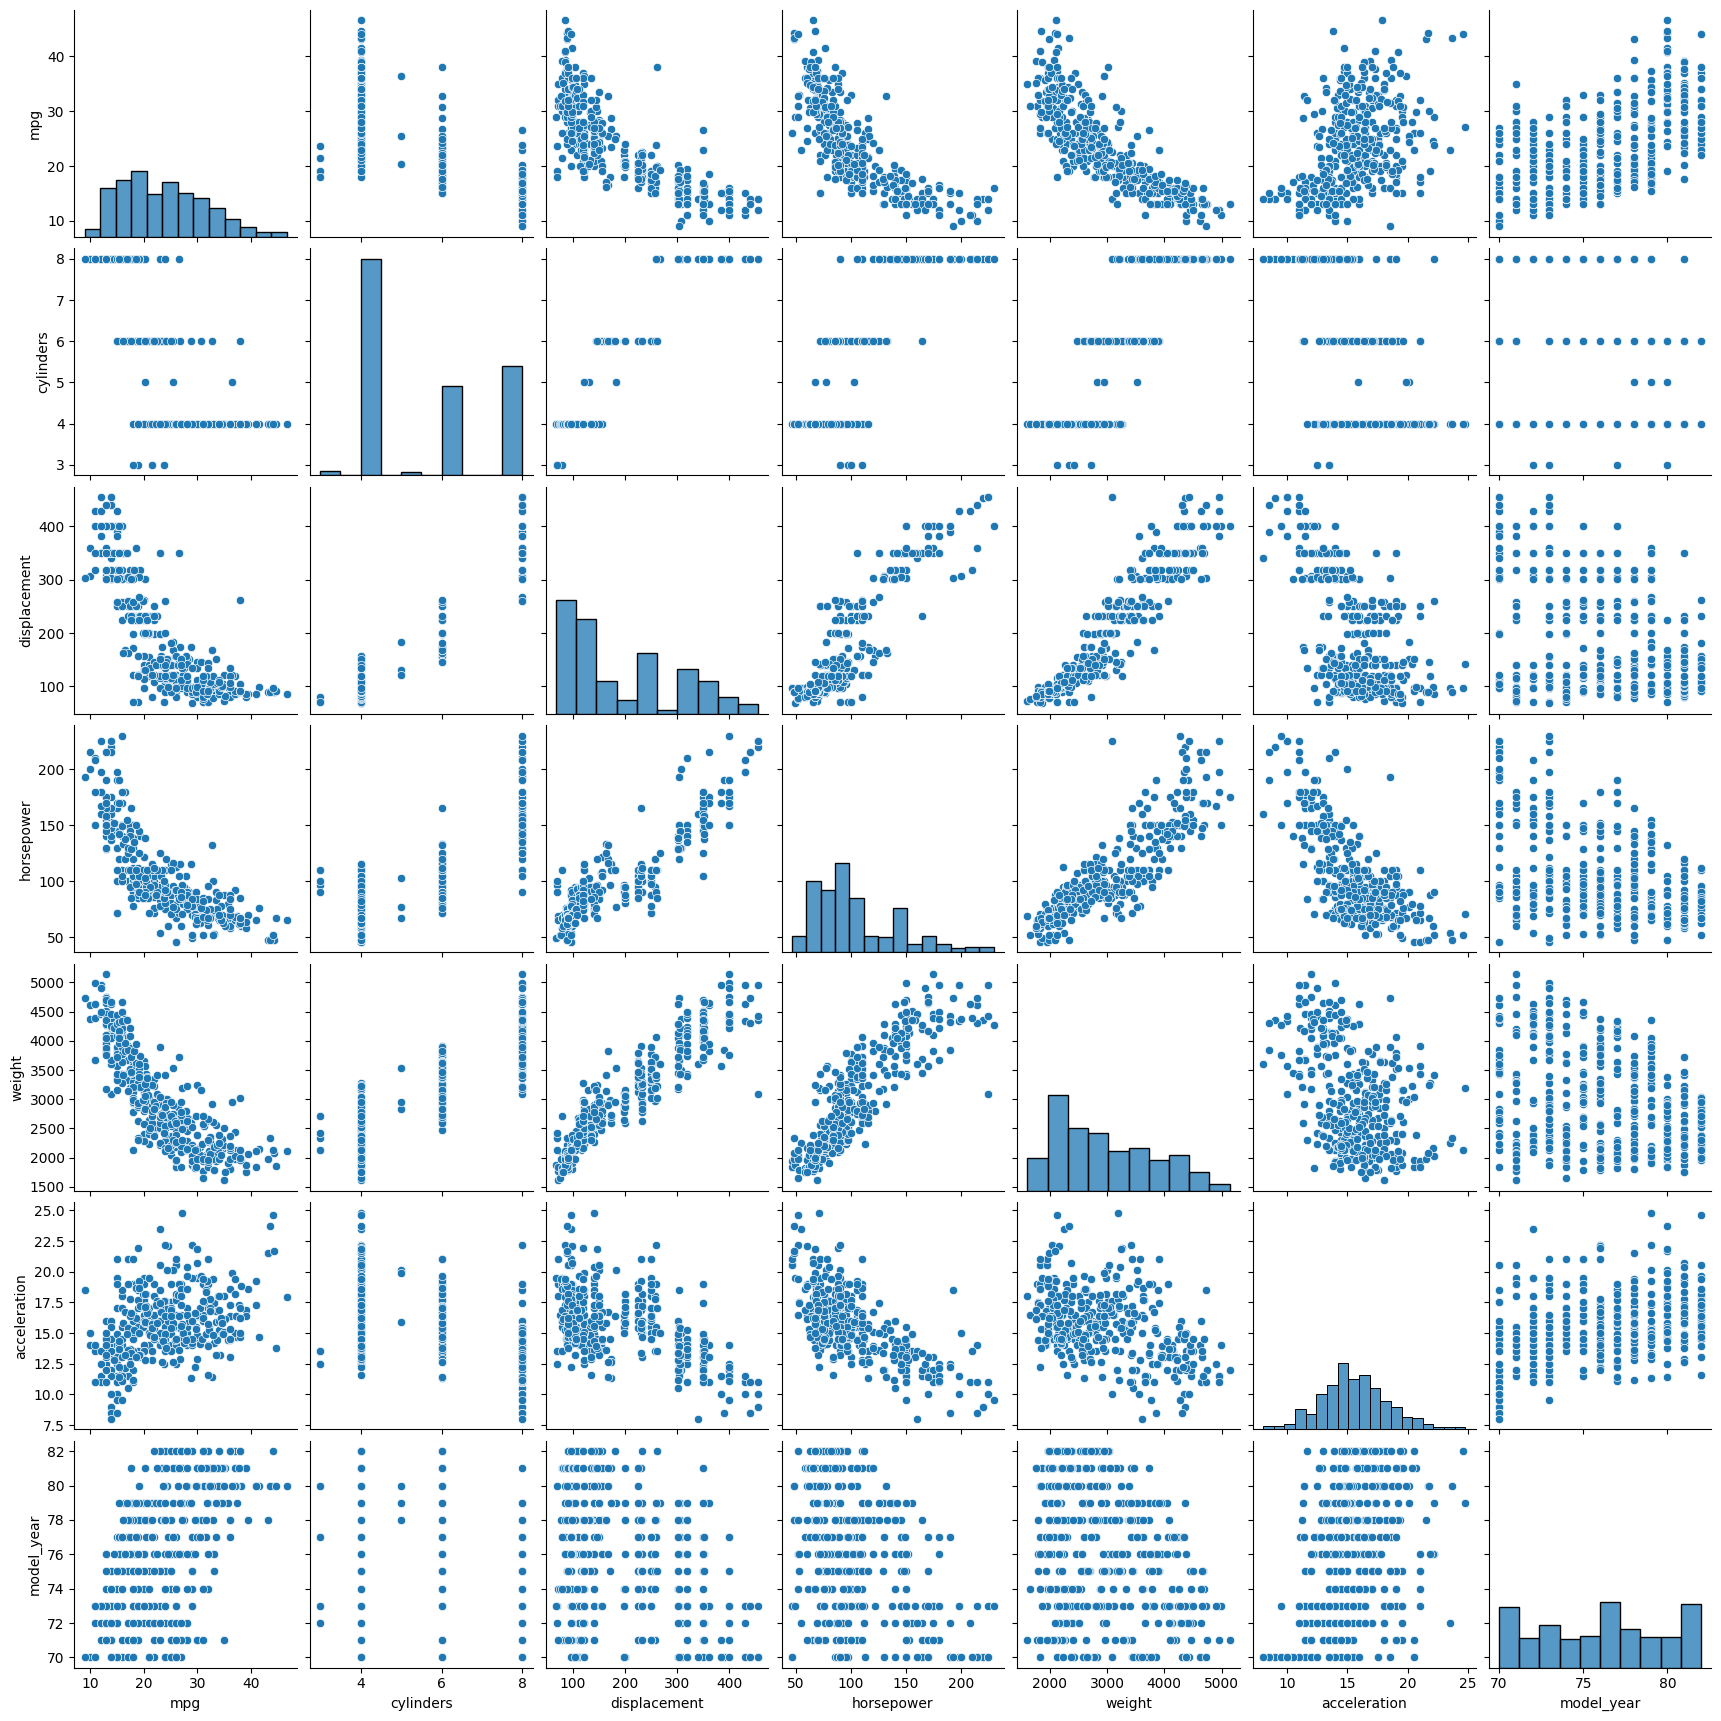

In [ ]:
sns.pairplot(df)

In [ ]:
#Identitfy candidates for linear regression
X= df['weight']
y= df['acceleration']

In [ ]:
corr_matrix = df.corr()

<ipython-input-9-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

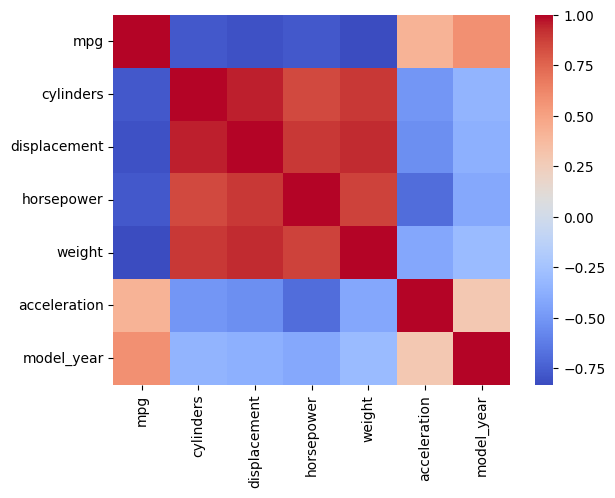

In [ ]:
sns.heatmap (corr_matrix, cmap='coolwarm')

In [ ]:
X= df['weight']
y= df['acceleration']

<Axes: xlabel='weight', ylabel='acceleration'>

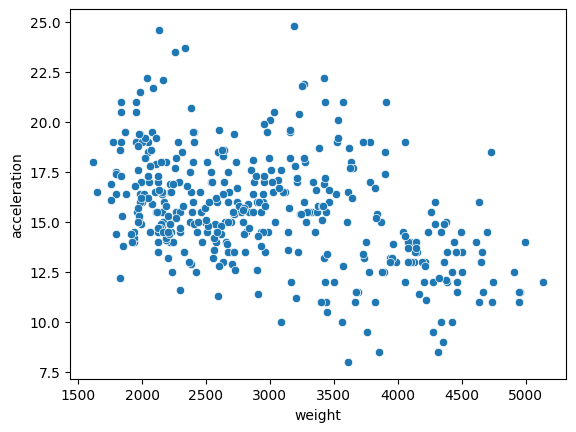

In [ ]:
sns.scatterplot (x=X, y=y)

In [ ]:
from sklearn.model_selection import train_test_split


X= df.weight
y= df.acceleration

X_train, X_test, y_train, y_test = (train_test_split (X, y,
                                                      test_size=0.33, random_state=42))

In [ ]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))

Text(0.5, 1.0, 'My first prediction')

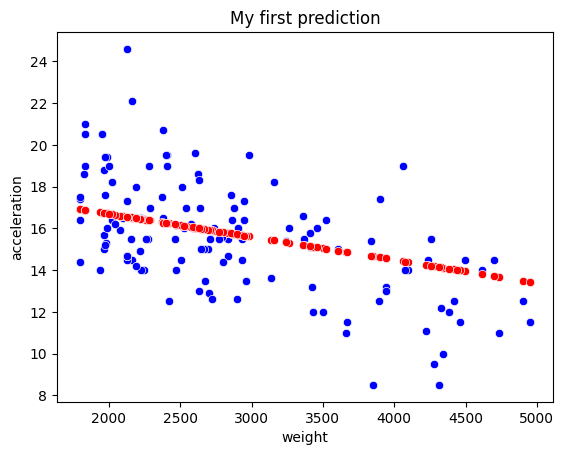

In [ ]:
#Checar!!!!
sns.scatterplot (x=X_test, y=y_test, color='blue')
sns.scatterplot (x=X_test, y=y_pred, color='red')
plt.title ('My first prediction')

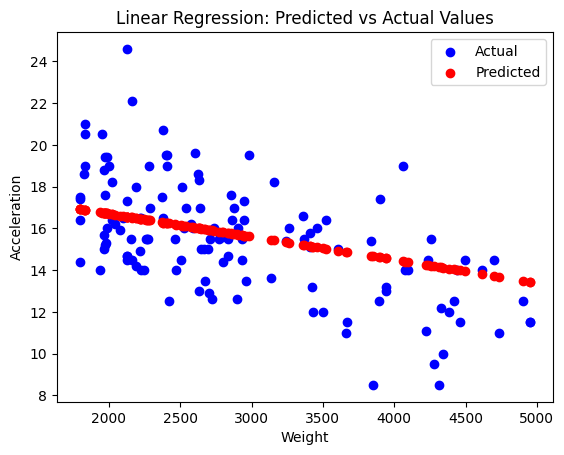

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['weight']]  # Assuming 'weight' is the independent variable
y = df['acceleration']  # Assuming 'acceleration' is the dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plotting the predicted values versus the actual values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Weight')
plt.ylabel('Acceleration')
plt.title('Linear Regression: Predicted vs Actual Values')
plt.legend()
plt.show()
